In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from termcolor import colored

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn import metrics

from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge, HuberRegressor, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.cross_decomposition import PLSRegression

from sklearn.metrics import mean_squared_error

import requests
from io import BytesIO

import warnings

In [132]:

github_url = 'https://github.com/VIJAY-0/AIMLproj/blob/main/IL_solubilities.xlsx'
# github_url = 'https://github.com/VIJAY-0/AIMLproj/blob/ca51647a1e83cbfebd02665706af7f347c6e7d93/IL_solubilities.xlsx'

# Fetch the Excel file from GitHub
response = requests.get(github_url)
excel_data = response.content

# Read the Excel file into a pandas DataFrame
data = pd.read_excel(BytesIO(excel_data), engine='openpyxl')  # or engine='xlrd' for .xls files


data.head()



BadZipFile: File is not a zip file

EDA

In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10116 entries, 0 to 10115
Columns: 141 entries, IL to [thma]
dtypes: float64(54), object(3), uint8(84)
memory usage: 5.3+ MB


In [5]:
data.describe()


,x_CO2,T (K),P (bar),[CH3],[CH2],[CH],[OCH2],[OCH3],[CF2],[CF3],...,[MeSO3],[TfO],[NfO],[TDfO],[TOS],[C12PhSO3],[DMPO4],[DEPO4],[DBPO4],[methide]
count,10118.000000,10118.000000,10118.000000,10117.000000,10117.000000,10117.000000,10117.000000,10117.000000,10117.000000,10117.000000,...,10117.000000,10117.000000,10117.000000,10117.000000,10117.000000,10117.000000,10117.000000,10117.000000,10117.000000,10117.000000
mean,0.334953,325.275269,54.252011,2.352871,9.446674,0.042700,0.038944,0.084215,0.076505,0.019966,...,0.045468,0.109716,0.015420,0.011664,0.007117,0.022141,0.002372,0.011268,0.003558,0.004151
std,0.236252,25.284281,76.783875,118.321996,475.073491,2.162021,1.965063,4.239637,3.867246,1.008954,...,2.291290,5.521966,0.780318,0.591443,0.362797,1.118301,0.124159,0.571561,0.183835,0.213666
min,0.000065,243.200000,0.007980,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.135000,308.150000,9.994575,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.299200,323.150000,26.800000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.512000,342.605000,64.772500,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.951600,453.150000,499.900000,11902.000000,47786.000000,216.000000,197.000000,426.000000,387.000000,101.000000,...,230.000000,555.000000,78.000000,59.000000,36.000000,112.000000,12.000000,57.000000,18.000000,21.000000


In [68]:
data = data.dropna()
data.describe

<bound method NDFrame.describe of                  IL  cation   anion  x_CO2   T (K)  P (bar)  [CH3]  [CH2]  \
0       [BMIM][BF4]  [BMIM]   [BF4]  0.610  363.15   246.00    1.0    3.0   
1       [BMIM][BF4]  [BMIM]   [BF4]  0.500  383.15   235.00    1.0    3.0   
2       [BMIM][BF4]  [BMIM]   [BF4]  0.610  353.15   223.30    1.0    3.0   
3       [BMIM][BF4]  [BMIM]   [BF4]  0.500  373.15   198.00    1.0    3.0   
4       [BMIM][BF4]  [BMIM]   [BF4]  0.610  343.15   188.50    1.0    3.0   
...             ...     ...     ...    ...     ...      ...    ...    ...   
10111  [HMIM][Tf2N]  [HMIM]  [Tf2N]  0.592  298.15    35.86    1.0    5.0   
10112  [HMIM][Tf2N]  [HMIM]  [Tf2N]  0.239  343.15    27.54    1.0    5.0   
10113  [HMIM][Tf2N]  [HMIM]  [Tf2N]  0.396  298.15    20.15    1.0    5.0   
10114  [HMIM][Tf2N]  [HMIM]  [Tf2N]  0.140  343.15    17.93    1.0    5.0   
10115  [HMIM][Tf2N]  [HMIM]  [Tf2N]  0.139  323.15     8.00    1.0    5.0   

       [CH]  [OCH2]  ...  [MeSO3]  [TfO] 

In [69]:
one_hot_encoded_anion = pd.get_dummies(data['anion'])
one_hot_encoded_cation = pd.get_dummies(data['cation'])
# print(one_hot_encoded)
df_encoded = pd.concat([data, one_hot_encoded_anion,one_hot_encoded_cation], axis=1)


In [70]:
data = df_encoded
data.describe()

,x_CO2,T (K),P (bar),[CH3],[CH2],[CH],[OCH2],[OCH3],[CF2],[CF3],...,[PMPY],[PMPip],[S222],[aMIM],[deme],[he],[hea],[m-2-HEA],[oleyl-MIM],[thma]
count,10116.000000,10116.000000,10116.000000,10116.000000,10116.000000,10116.000000,10116.000000,10116.000000,10116.000000,10116.000000,...,10116.000000,10116.000000,10116.000000,10116.000000,10116.000000,10116.000000,10116.000000,10116.000000,10116.000000,10116.000000
mean,0.334925,325.270741,54.213319,1.176552,4.723804,0.021352,0.019474,0.042112,0.038256,0.009984,...,0.004943,0.003559,0.003855,0.003855,0.003855,0.002669,0.002076,0.007711,0.004152,0.002966
std,0.236172,25.241606,76.661610,0.961888,5.483308,0.252205,0.161910,0.200853,0.393496,0.099426,...,0.070134,0.059552,0.061974,0.061974,0.061974,0.051596,0.045517,0.087475,0.064304,0.054379
min,0.000065,243.200000,0.007980,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.135000,308.150000,9.995525,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.299200,323.150000,26.800000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.512000,342.595000,64.757500,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.951600,453.150000,499.900000,7.000000,28.000000,3.000000,2.000000,1.000000,5.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [71]:
scaler = StandardScaler()
data['T (K)'] = scaler.fit_transform(data[['T (K)']])
data['P (bar)'] = scaler.fit_transform(data[['P (bar)']])

In [72]:
data.describe()


,x_CO2,T (K),P (bar),[CH3],[CH2],[CH],[OCH2],[OCH3],[CF2],[CF3],...,[PMPY],[PMPip],[S222],[aMIM],[deme],[he],[hea],[m-2-HEA],[oleyl-MIM],[thma]
count,10116.000000,1.011600e+04,1.011600e+04,10116.000000,10116.000000,10116.000000,10116.000000,10116.000000,10116.000000,10116.000000,...,10116.000000,10116.000000,10116.000000,10116.000000,10116.000000,10116.000000,10116.000000,10116.000000,10116.000000,10116.000000
mean,0.334925,1.702605e-15,3.371496e-17,1.176552,4.723804,0.021352,0.019474,0.042112,0.038256,0.009984,...,0.004943,0.003559,0.003855,0.003855,0.003855,0.002669,0.002076,0.007711,0.004152,0.002966
std,0.236172,1.000049e+00,1.000049e+00,0.961888,5.483308,0.252205,0.161910,0.200853,0.393496,0.099426,...,0.070134,0.059552,0.061974,0.061974,0.061974,0.051596,0.045517,0.087475,0.064304,0.054379
min,0.000065,-3.251568e+00,-7.071077e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.135000,-6.783082e-01,-5.768204e-01,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.299200,-8.402184e-02,-3.576063e-01,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.512000,6.863714e-01,1.375487e-01,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.951600,5.066460e+00,5.813975e+00,7.000000,28.000000,3.000000,2.000000,1.000000,5.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


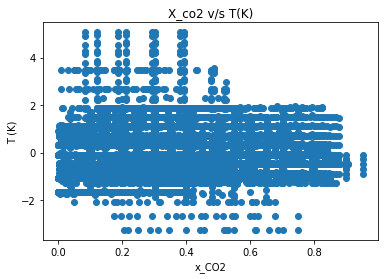

In [81]:
import matplotlib.pyplot as plt

plt.scatter(data['x_CO2'] , data['T (K)'])
plt.xlabel('x_CO2')
plt.ylabel('T (K)')
plt.title('X_co2 v/s T(K)')
plt.show()


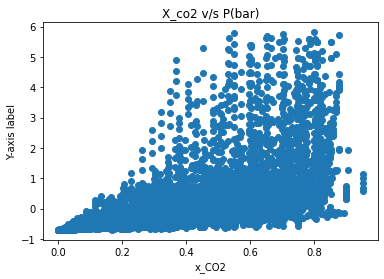

In [80]:
plt.scatter(data['x_CO2'],data['P (bar)'])
plt.xlabel('x_CO2')
plt.ylabel('Y-axis label')
plt.title('X_co2 v/s P(bar)')
plt.show()


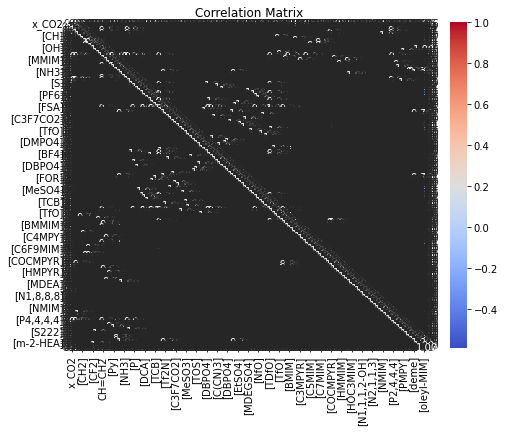

In [135]:
sorted(data.corr()['x_CO2'])

corr_matrix = data.corr()

# Plot correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


<AxesSubplot:xlabel='P (bar)'>

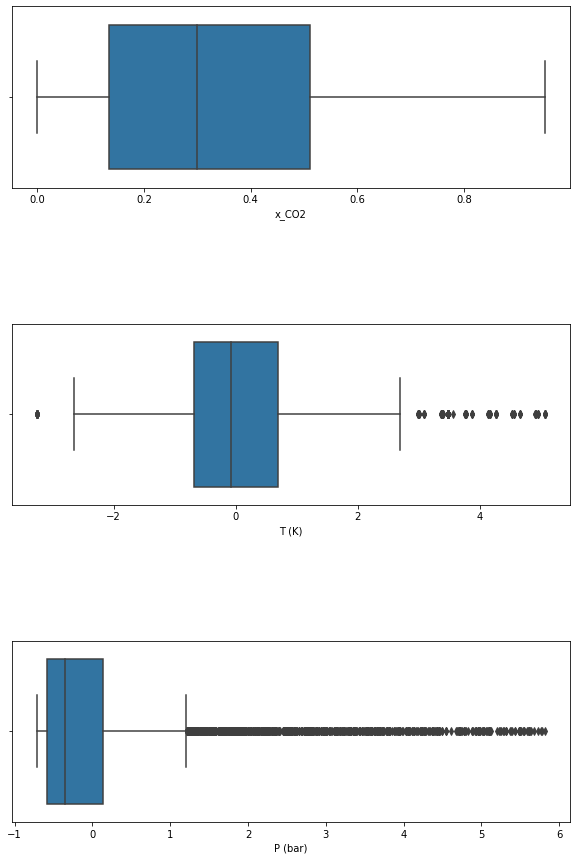

In [74]:
fig, ax = plt.subplots(3, 1, figsize=(10, 15))
fig.subplots_adjust(hspace=0.75)
sns.boxplot(x=data['x_CO2'],data=data ,ax =ax[0])
sns.boxplot(x=data['T (K)'],data=data,ax =ax[1])
sns.boxplot(x=data['P (bar)'],data=data,ax =ax[2])

In [75]:
cols=['IL','cation','anion','x_CO2']
data.dropna(inplace=True)
X =data.drop(columns=cols, axis=1)
y=data['x_CO2']


In [120]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=95,test_size=0.2)

In [125]:
x_axis =np.linspace(1, y_test.size, y_test.size)
print(x_axis)

[1.000e+00 2.000e+00 3.000e+00 ... 2.022e+03 2.023e+03 2.024e+03]


MODEL SELECTION

Linear Regression: RMSE = 0.13745553847878253


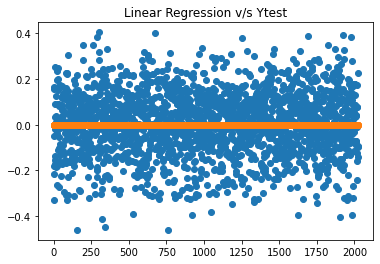

Mean Absolute error :  0.10912301132239088
Standard Deviation :  0.08358345206095175


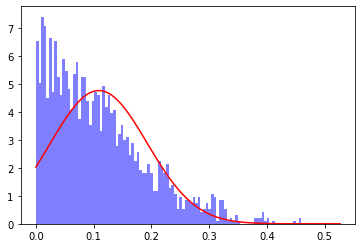

------------------------------------------------------------------------------------------------------------------
Ridge Regression: RMSE = 0.13742307648036065


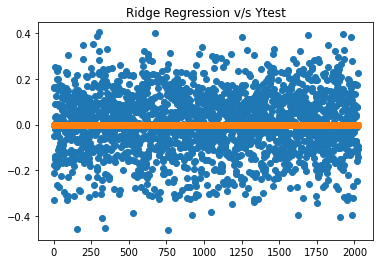

Mean Absolute error :  0.10914003787477776
Standard Deviation :  0.08350780850925932


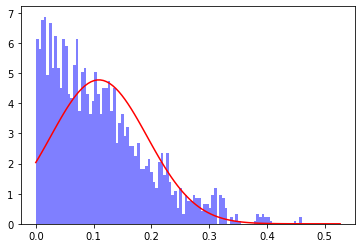

------------------------------------------------------------------------------------------------------------------
Lasso Regression: RMSE = 0.2375549305661897


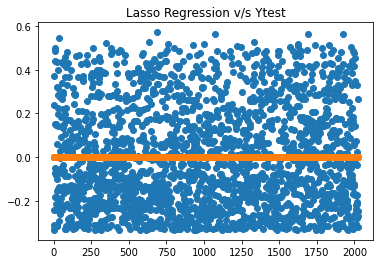

Mean Absolute error :  0.20210448481488763
Standard Deviation :  0.12484439216086583


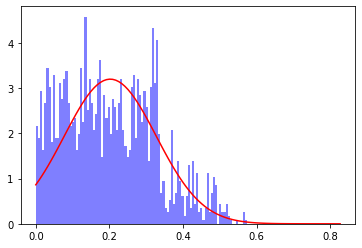

------------------------------------------------------------------------------------------------------------------
Bayesian Ridge Regression: RMSE = 0.13742087675323345


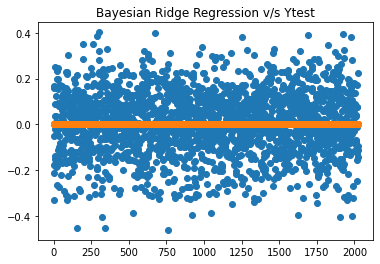

Mean Absolute error :  0.10919580379266583
Standard Deviation :  0.08343125194854147


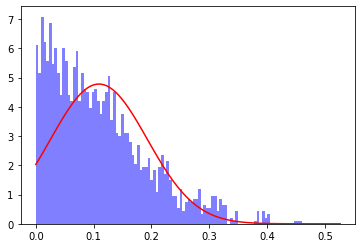

------------------------------------------------------------------------------------------------------------------
Huber Regression: RMSE = 0.13983876924384941


c:\Users\Vijendra Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


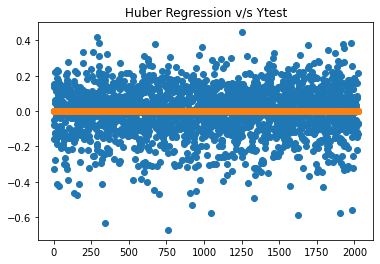

Mean Absolute error :  0.10622376092513972
Standard Deviation :  0.09094720445705477


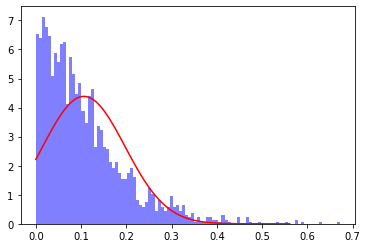

------------------------------------------------------------------------------------------------------------------
ElasticNet: RMSE = 0.2375549305661897


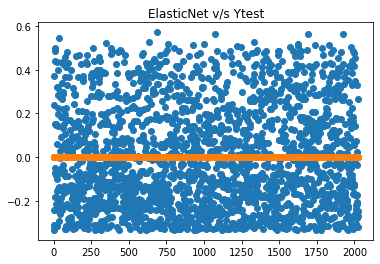

Mean Absolute error :  0.20210448481488763
Standard Deviation :  0.12484439216086583


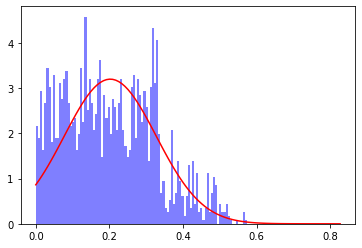

------------------------------------------------------------------------------------------------------------------
Decision Tree Regression: RMSE = 0.04713808292647028


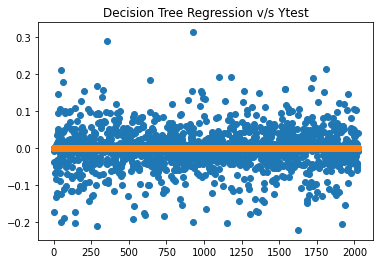

Mean Absolute error :  0.027911019909344824
Standard Deviation :  0.037986495358257856


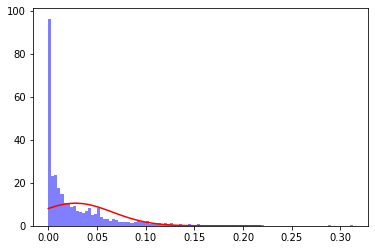

------------------------------------------------------------------------------------------------------------------
Random Forest Regression: RMSE = 0.035207066695142966


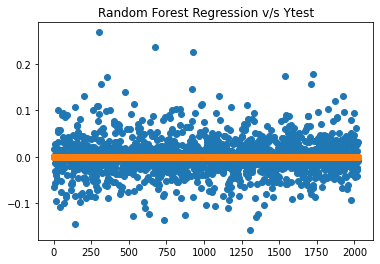

Mean Absolute error :  0.022271037503415362
Standard Deviation :  0.02726790116231375


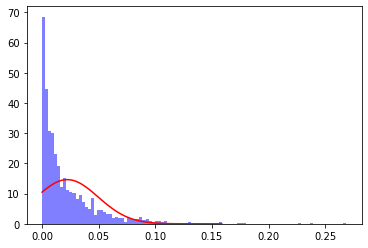

------------------------------------------------------------------------------------------------------------------
Gradient Boosting Regression: RMSE = 0.043206137043627364


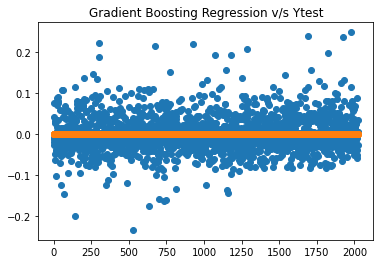

Mean Absolute error :  0.030562591724636098
Standard Deviation :  0.030540109124001406


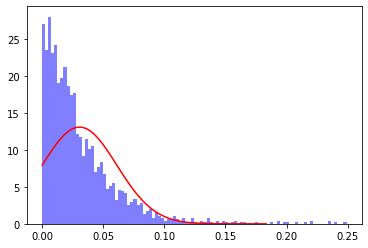

------------------------------------------------------------------------------------------------------------------
K-Nearest Neighbors Regression: RMSE = 0.05564625300102516


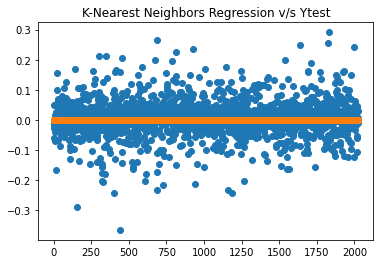

Mean Absolute error :  0.03669414761147165
Standard Deviation :  0.041833539225382674


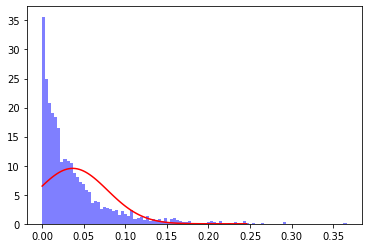

------------------------------------------------------------------------------------------------------------------
Support Vector Regression: RMSE = 0.07532787811620321


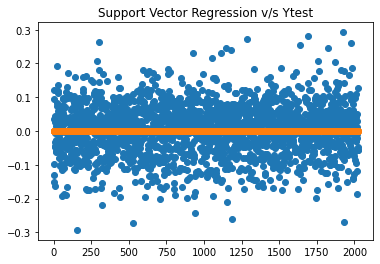

Mean Absolute error :  0.05901195900495936
Standard Deviation :  0.046817495831009186


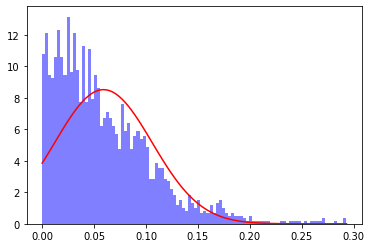

------------------------------------------------------------------------------------------------------------------


In [129]:
from scipy.stats import norm
# Initialize regression models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Bayesian Ridge Regression': BayesianRidge(),
    'Huber Regression': HuberRegressor(),
    'ElasticNet': ElasticNet(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(),
    'Gradient Boosting Regression': GradientBoostingRegressor(),
    'K-Nearest Neighbors Regression': KNeighborsRegressor(),
    'Support Vector Regression': SVR(),
}


for name, model in models.items():
    if name in ['Principal Component Regression', 'Partial Least Squares Regression']:
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        if name == 'Principal Component Regression':
            pca = PCA(n_components=3)
            X_train_pca = pca.fit_transform(X_train_scaled)
            X_test_pca = pca.transform(X_test_scaled)
            model.fit(X_train_pca, y_train)
            y_pred = model.predict(X_test_pca)
        elif name == 'Partial Least Squares Regression':
            pls = PLSRegression(n_components=3)
            pls.fit(X_train_scaled, y_train)
            y_pred = pls.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name}: RMSE = {rmse}")
    x_axis =np.linspace(1, y_test.size, y_test.size)
    plt.scatter(x_axis,y_test-y_pred)
    plt.scatter(x_axis,y_test-y_test)
    plt.title( name+" v/s Ytest")
    plt.show()



    abs_error = abs(y_test-y_pred)
    mu, sigma = np.mean(abs_error), np.std(abs_error)
    print("Mean Absolute error : ",mu)
    print("Standard Deviation : ",sigma)
    x = np.linspace(0, mu + 5*sigma, 100)
    pdf = norm.pdf(x, mu, sigma)
    plt.hist(abs_error, bins=100, density=True, alpha=0.5, color='blue', label='Data Histogram')
    plt.plot(x, pdf, label='Estimated Gaussian Distribution', color='red')
    plt.show()
    print('------------------------------------------------------------------------------------------------------------------')


ANN RMSE: 0.050246080801322805


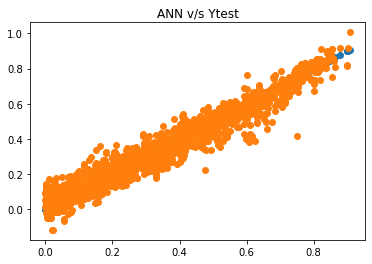

In [136]:

ann_model = MLPRegressor(hidden_layer_sizes=(10,10), activation='relu', solver='adam', max_iter=1000)
ann_model.fit(X_train, y_train)

ann_predictions = ann_model.predict(X_test)
ann_rmse = np.sqrt(mean_squared_error(y_test, ann_predictions))

print("ANN RMSE:", ann_rmse)


ann_predictions = ann_model.predict(X_test)

plt.scatter(y_test,y_test)
plt.scatter(y_test,ann_predictions)
plt.title('ANN v/s Ytest')
plt.show()

Hyper Parameter OPTIMIZATION

In [130]:

# Define hyperparameters grid for each model
param_grids = {
    'Ridge Regression': {'alpha': [0.1, 1.0, 10.0,50.0,100.0,200.0]},
    'Lasso Regression': {'alpha': [0.1, 1.0, 10.0]},
    'Bayesian Ridge Regression': {'alpha_1': [1e-6, 1e-5, 1e-4], 'alpha_2': [1e-6, 1e-5, 1e-4],'lambda_1': [1e-6, 1e-5, 1e-4], 'lambda_2': [1e-6, 1e-5, 1e-4]},
    'Huber Regression': {'alpha': [0.0001, 0.001, 0.01]},
    'ElasticNet': {'alpha': [0.1, 1.0, 10.0], 'l1_ratio': [0.1, 0.5, 0.9]},
    'Decision Tree Regression': {'max_depth': [None, 5, 10, 20]},
    'Random Forest Regression': {'n_estimators': [10, 50, 100], 'max_depth': [None, 5, 10, 20]},
    'Gradient Boosting Regression': {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7]},
    'K-Nearest Neighbors Regression': {'n_neighbors': [3, 5, 7]},
    'Support Vector Regression': {'C': [0.1, 1.0, 10.0], 'kernel': ['linear', 'rbf']}
}

# Initialize models
models = {
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Bayesian Ridge Regression': BayesianRidge(),
    'Huber Regression': HuberRegressor(),
    'ElasticNet': ElasticNet(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(),
    'Gradient Boosting Regression': GradientBoostingRegressor(),
    'K-Nearest Neighbors Regression': KNeighborsRegressor(),
    'Support Vector Regression': SVR()
}

# Perform grid search for each model
for name, model in models.items():
    param_grid = param_grids[name]
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X, y)
    
    # Get the best hyperparameters and model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    
    print(f"{name}: Best Parameters = {best_params}")

Ridge Regression: Best Parameters = {'alpha': 10.0}
Lasso Regression: Best Parameters = {'alpha': 0.1}
Bayesian Ridge Regression: Best Parameters = {'alpha_1': 1e-06, 'alpha_2': 0.0001, 'lambda_1': 0.0001, 'lambda_2': 1e-06}


c:\Users\Vijendra Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Vijendra Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Vijendra Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarni

Huber Regression: Best Parameters = {'alpha': 0.0001}
ElasticNet: Best Parameters = {'alpha': 0.1, 'l1_ratio': 0.1}
Decision Tree Regression: Best Parameters = {'max_depth': None}
Random Forest Regression: Best Parameters = {'max_depth': 20, 'n_estimators': 50}
Gradient Boosting Regression: Best Parameters = {'max_depth': 7, 'n_estimators': 200}
K-Nearest Neighbors Regression: Best Parameters = {'n_neighbors': 3}
Support Vector Regression: Best Parameters = {'C': 10.0, 'kernel': 'rbf'}


In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

ann_param_grid = {
    'hidden_layer_sizes': [(50, 50), (100, 50)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
}

ann_model = MLPRegressor(max_iter=1000)

ann_grid_search = GridSearchCV(estimator=ann_model, param_grid=ann_param_grid, cv=3, scoring='neg_mean_squared_error')
ann_grid_search.fit(X_train, y_train)

best_ann_params = ann_grid_search.best_params_
best_ann_score = np.sqrt(-ann_grid_search.best_score_)

print("Best ANN parameters:", best_ann_params)
print("Best ANN RMSE:", best_ann_score)


Best ANN parameters: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'solver': 'adam'}
Best ANN RMSE: 0.07302216994271751
